In [1]:
# IMPORTING PANDAS
import pandas as pd

# IMPORTING NUMPY
import numpy as np

# IMPORTING MATPLOTLIB
import matplotlib.pyplot as plt

# IMPORTING SEABORN
import seaborn as sns

# CREATING INLINE FIGURES
%matplotlib inline

In [2]:
data = pd.read_csv('Datasets/Pre-Processed-Data.csv.')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   METALLOGEN         432 non-null    object 
 1   LOCALITY           432 non-null    object 
 2   STATE              432 non-null    object 
 3   TOPOSHEET          432 non-null    object 
 4   MINERAL_OR         432 non-null    object 
 5   HOSTROCK_TYPE1     430 non-null    object 
 6   HOSTROCK_TYPE2     430 non-null    object 
 7   HOSTROCK_TYPE3     432 non-null    object 
 8   HOSTROCK_TYPE4     432 non-null    object 
 9   MORPH-STRATABOUND  432 non-null    int64  
 10  MORPH-SEDIMENTARY  432 non-null    int64  
 11  MORPH-BEDDED       432 non-null    int64  
 12  MORPH-SHEAR        432 non-null    int64  
 13  MORPH-CONCORDANT   432 non-null    int64  
 14  MORPH-DISCORDANT   432 non-null    int64  
 15  MORPH-LENSOID      432 non-null    int64  
 16  MORPH-RESIDUAL     432 non

In [4]:
data.head()

,METALLOGEN,LOCALITY,STATE,TOPOSHEET,MINERAL_OR,HOSTROCK_TYPE1,HOSTROCK_TYPE2,HOSTROCK_TYPE3,HOSTROCK_TYPE4,MORPH-STRATABOUND,...,MORPH-DISCORDANT,MORPH-LENSOID,MORPH-RESIDUAL,MORPH-VEIN,MORPH-REMOBILISED,MORPH-MAGMATIC,MORPH-QUARTZ,MORPH-VOLCANIC,MORPH-OTHER,RESERVE_AMT
0,EASTERN GHAT BELT,BAGHDAPA,ORISSA,73 C,Be,PEGMATITE IN GRANULITE,-,-,-,0,...,0,0,1,0,0,0,0,0,0,38146.00
1,SARGIPALLI BELT,SARGIPALLI,ORISSA,64 N,Pb,GARNETIFEROUS MICA SCHIST,-,-,-,1,...,0,0,0,0,1,0,0,0,0,2.63
2,RORO-JOJOHATU BELT,"RORO,JOJOHATU",JHARKHAND,73,Cr,ULTRAMAFIC SUIT,-,-,-,0,...,0,0,0,0,0,1,0,0,0,123283.00
3,BONAI-NOAMUNDI-JAMDA BELT,ITAR-BALIJODI,ORISSA,73,Fe-Hematite,BHQ,SHALE INTERLAYERED WITH LAVA,-,-,0,...,0,0,0,0,0,0,0,1,0,3.00
4,BONAI-NOAMUNDI-JAMDA BELT,MERALGORA,JHARKHAND,73,Fe-Hematite,BHQ,SHALE,BHQ,-,0,...,0,0,0,0,0,0,0,1,0,1.50


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
LE = LabelEncoder()
data['METALLOGEN'] = LE.fit_transform(data['METALLOGEN'])
data['LOCALITY'] = LE.fit_transform(data['LOCALITY'])
data['STATE'] =  LE.fit_transform(data['STATE'])
data['TOPOSHEET'] = LE.fit_transform(data['TOPOSHEET'])
data['HOSTROCK_TYPE1'] = LE.fit_transform(data['HOSTROCK_TYPE1'])
data['HOSTROCK_TYPE2'] = LE.fit_transform(data['HOSTROCK_TYPE2'])
data['HOSTROCK_TYPE3'] = LE.fit_transform(data['HOSTROCK_TYPE3'])
data['HOSTROCK_TYPE4'] = LE.fit_transform(data['HOSTROCK_TYPE4'])
data['MINERAL_OR'] = LE.fit_transform(data['MINERAL_OR'])


In [7]:
data.head()

,METALLOGEN,LOCALITY,STATE,TOPOSHEET,MINERAL_OR,HOSTROCK_TYPE1,HOSTROCK_TYPE2,HOSTROCK_TYPE3,HOSTROCK_TYPE4,MORPH-STRATABOUND,...,MORPH-DISCORDANT,MORPH-LENSOID,MORPH-RESIDUAL,MORPH-VEIN,MORPH-REMOBILISED,MORPH-MAGMATIC,MORPH-QUARTZ,MORPH-VOLCANIC,MORPH-OTHER,RESERVE_AMT
0,32,21,9,59,8,82,0,0,0,0,...,0,0,1,0,0,0,0,0,0,38146.00
1,94,256,9,43,35,50,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2.63
2,85,247,4,57,10,122,0,0,0,0,...,0,0,0,0,0,1,0,0,0,123283.00
3,23,135,9,57,24,10,63,0,0,0,...,0,0,0,0,0,0,0,1,0,3.00
4,23,204,4,57,24,10,62,7,0,0,...,0,0,0,0,0,0,0,1,0,1.50


In [8]:
len(data)

432

In [9]:
data["MINERAL_OR"].max()

41

In [10]:
# BALANCING THE DATA FOR CLASSIFICATION
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print(Counter(data["MINERAL_OR"]))

Counter({24: 79, 13: 70, 1: 60, 0: 43, 36: 34, 29: 28, 30: 13, 10: 12, 27: 9, 9: 8, 18: 7, 23: 7, 26: 6, 40: 5, 38: 5, 37: 4, 25: 3, 20: 3, 6: 3, 3: 3, 35: 2, 34: 2, 5: 2, 19: 2, 22: 2, 41: 2, 4: 2, 21: 2, 8: 1, 11: 1, 39: 1, 12: 1, 33: 1, 17: 1, 32: 1, 14: 1, 16: 1, 2: 1, 28: 1, 31: 1, 15: 1, 7: 1})


Counter({'Fe-Hematite': 79, 'Cu': 70, 'Au': 60, 'Al-Bauxite': 43, 'Pb-Zn': 34, 'Mn': 28, 'Mn-Fe': 13, 'Cr': 12, 'Fe-Ti-V': 9, 'Be-Nb-Ta': 8, 'Cu-Pb': 7, 'Cu-Zn': 7, 'Fe-Magnetite': 6, 'WO3': 5, 'Pb-Zn-Cu': 5, 'Pb-Zn-Ag': 4, 'Fe-Hematite-Mn': 3, 'Cu-Pb-Zn': 3, 'Au-W': 3, 'Au-Cu': 3, 'Pb': 2, 'Nb-Ta-Li-Sn': 2, 'Au-Mo': 2, 'Cu-Pb-Ba': 2, 'Cu-U': 2, 'Zn': 2, 'Au-Cu-Zn': 2, 'Cu-Pb-Zn-Sb-Py': 2, 'Be': 1, 'Cr-PGE': 1, 'U': 1, 'Cs': 1, 'Nb-Ta': 1, 'Cu-Ni': 1, 'Mo-U-Cu': 1, 'Cu-Co': 1, 'Cu-Mo-Au': 1, 'Au-Ag-Cu-Pb-Zn': 1, 'Ma': 1, 'Mo': 1, 'Cu-Fe-Ti-V': 1, 'Ba': 1})

In [11]:
mineral_labels = {'Fe-Hematite': 24, 'Cu': 13, 'Au': 1, 'Al-Bauxite': 0, 'Pb-Zn': 36, 'Mn': 29, 'Mn-Fe': 30, 'Cr': 10, 'Fe-Ti-V': 27, 'Be-Nb-Ta': 9, 'Cu-Pb': 18, 'Cu-Zn': 23, 'Fe-Magnetite': 26, 'WO3': 40, 'Pb-Zn-Cu': 38, 'Pb-Zn-Ag': 37, 'Fe-Hematite-Mn': 25, 'Cu-Pb-Zn': 20, 'Au-W': 6, 'Au-Cu': 3, 'Pb': 35, 'Nb-Ta-Li-Sn': 34, 'Au-Mo': 5, 'Cu-Pb-Ba': 19, 'Cu-U': 12, 'Zn': 41, 'Au-Cu-Zn': 4, 'Cu-Pb-Zn-Sb-Py': 21, 'Be': 8, 'Cr-PGE': 11, 'U': 39, 'Cs': 12, 'Nb-Ta': 33, 'Cu-Ni': 17, 'Mo-U-Cu': 32, 'Cu-Co': 14, 'Cu-Mo-Au': 16, 'Au-Ag-Cu-Pb-Zn': 2, 'Ma': 28, 'Mo': 31, 'Cu-Fe-Ti-V': 15, 'Ba': 7}

In [12]:
ros=RandomOverSampler()
X,Y=ros.fit_resample(data,data["MINERAL_OR"])
print(Counter(Y))

Counter({8: 79, 35: 79, 10: 79, 24: 79, 29: 79, 25: 79, 30: 79, 13: 79, 11: 79, 0: 79, 34: 79, 9: 79, 27: 79, 1: 79, 5: 79, 18: 79, 19: 79, 36: 79, 39: 79, 20: 79, 22: 79, 12: 79, 33: 79, 6: 79, 40: 79, 41: 79, 3: 79, 17: 79, 38: 79, 23: 79, 4: 79, 37: 79, 32: 79, 14: 79, 16: 79, 2: 79, 26: 79, 28: 79, 31: 79, 15: 79, 7: 79, 21: 79})


In [13]:
X.head()

,METALLOGEN,LOCALITY,STATE,TOPOSHEET,MINERAL_OR,HOSTROCK_TYPE1,HOSTROCK_TYPE2,HOSTROCK_TYPE3,HOSTROCK_TYPE4,MORPH-STRATABOUND,...,MORPH-DISCORDANT,MORPH-LENSOID,MORPH-RESIDUAL,MORPH-VEIN,MORPH-REMOBILISED,MORPH-MAGMATIC,MORPH-QUARTZ,MORPH-VOLCANIC,MORPH-OTHER,RESERVE_AMT
0,32,21,9,59,8,82,0,0,0,0,...,0,0,1,0,0,0,0,0,0,38146.00
1,94,256,9,43,35,50,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2.63
2,85,247,4,57,10,122,0,0,0,0,...,0,0,0,0,0,1,0,0,0,123283.00
3,23,135,9,57,24,10,63,0,0,0,...,0,0,0,0,0,0,0,1,0,3.00
4,23,204,4,57,24,10,62,7,0,0,...,0,0,0,0,0,0,0,1,0,1.50


In [14]:
len(X)

3318

X also contains RESERVE_AMT

# CLASSIFICATION MODEL

In [15]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.metrics import classification_report

# ANN

In [18]:
X

,METALLOGEN,LOCALITY,STATE,TOPOSHEET,MINERAL_OR,HOSTROCK_TYPE1,HOSTROCK_TYPE2,HOSTROCK_TYPE3,HOSTROCK_TYPE4,MORPH-STRATABOUND,...,MORPH-DISCORDANT,MORPH-LENSOID,MORPH-RESIDUAL,MORPH-VEIN,MORPH-REMOBILISED,MORPH-MAGMATIC,MORPH-QUARTZ,MORPH-VOLCANIC,MORPH-OTHER,RESERVE_AMT
0,32,21,9,59,8,82,0,0,0,0,...,0,0,1,0,0,0,0,0,0,38146.000
1,94,256,9,43,35,50,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2.630
2,85,247,4,57,10,122,0,0,0,0,...,0,0,0,0,0,1,0,0,0,123283.000
3,23,135,9,57,24,10,63,0,0,0,...,0,0,0,0,0,0,0,1,0,3.000
4,23,204,4,57,24,10,62,7,0,0,...,0,0,0,0,0,0,0,1,0,1.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,87,280,8,18,41,33,39,43,13,1,...,0,0,0,0,0,0,0,0,0,3.987
3314,108,124,10,4,41,40,28,0,0,1,...,0,0,0,0,0,0,0,0,0,1.680
3315,108,124,10,4,41,40,28,0,0,1,...,0,0,0,0,0,0,0,0,0,1.680
3316,87,280,8,18,41,33,39,43,13,1,...,0,0,0,0,0,0,0,0,0,3.987


In [19]:
X["MINERAL_OR"].nunique()

42

In [20]:
# Output LAyers =42
# Multiclass Classification - Softmax activation function

In [21]:
x = X.drop(["MINERAL_OR","RESERVE_AMT"],axis=1).values
y = X["MINERAL_OR"].values

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
x_train = scaler.fit_transform(x_train)

In [26]:
x_test = scaler.transform(x_test)

In [27]:
import tensorflow as tf
input_shape = x_train.shape

In [28]:
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten)
model.add(tf.keras.layers.Dense(units=200,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=42,activation='softmax'))

In [29]:
model.build(input_shape)

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (2488, 200)               4600      
                                                                 
 dropout (Dropout)           (2488, 200)               0         
                                                                 
 dense_1 (Dense)             (2488, 100)               20100     
                                                                 
 dropout_1 (Dropout)         (2488, 100)               0         
                                                                 
 dense_2 (Dense)             (2488, 42)                4242      
                                                                 
Total params: 28,942
Trainable params: 28,942
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor = 'val_accuracy', mode='max',verbose=1,patience=50)

In [34]:
model.fit(x_train,y_train,epochs=1000,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/1000
78/78 [==============================] - 0s 2ms/step - loss: 3.7449 - accuracy: 0.0305 - val_loss: 3.7018 - val_accuracy: 0.0398
Epoch 2/1000
78/78 [==============================] - 0s 1ms/step - loss: 3.7138 - accuracy: 0.0474 - val_loss: 3.6723 - val_accuracy: 0.0398
Epoch 3/1000
78/78 [==============================] - 0s 2ms/step - loss: 3.6859 - accuracy: 0.0527 - val_loss: 3.6447 - val_accuracy: 0.0542
Epoch 4/1000
78/78 [==============================] - 0s 1ms/step - loss: 3.6644 - accuracy: 0.0667 - val_loss: 3.6175 - val_accuracy: 0.0831
Epoch 5/1000
78/78 [==============================] - 0s 1ms/step - loss: 3.6391 - accuracy: 0.0679 - val_loss: 3.5886 - val_accuracy: 0.1554
Epoch 6/1000
78/78 [==============================] - 0s 1ms/step - loss: 3.6074 - accuracy: 0.0884 - val_loss: 3.5580 - val_accuracy: 0.2217
Epoch 7/1000
78/78 [==============================] - 0s 1ms/step - loss: 3.5696 - accuracy: 0.1105 - val_loss: 3.5253 - val_accuracy: 0.2229
Epoch 

78/78 [==============================] - 0s 1ms/step - loss: 1.4968 - accuracy: 0.5402 - val_loss: 1.1042 - val_accuracy: 0.7373
Epoch 59/1000
78/78 [==============================] - 0s 2ms/step - loss: 1.4749 - accuracy: 0.5382 - val_loss: 1.0853 - val_accuracy: 0.7410
Epoch 60/1000
78/78 [==============================] - 0s 1ms/step - loss: 1.4571 - accuracy: 0.5547 - val_loss: 1.0669 - val_accuracy: 0.7482
Epoch 61/1000
78/78 [==============================] - 0s 1ms/step - loss: 1.4270 - accuracy: 0.5675 - val_loss: 1.0494 - val_accuracy: 0.7470
Epoch 62/1000
78/78 [==============================] - 0s 1ms/step - loss: 1.4101 - accuracy: 0.5683 - val_loss: 1.0315 - val_accuracy: 0.7434
Epoch 63/1000
78/78 [==============================] - 0s 1ms/step - loss: 1.3694 - accuracy: 0.5824 - val_loss: 1.0160 - val_accuracy: 0.7434
Epoch 64/1000
78/78 [==============================] - 0s 1ms/step - loss: 1.3820 - accuracy: 0.5808 - val_loss: 1.0003 - val_accuracy: 0.7494
Epoch 65/1000

78/78 [==============================] - 0s 1ms/step - loss: 0.8525 - accuracy: 0.7408 - val_loss: 0.5481 - val_accuracy: 0.8458
Epoch 116/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.8618 - accuracy: 0.7520 - val_loss: 0.5469 - val_accuracy: 0.8470
Epoch 117/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.8299 - accuracy: 0.7500 - val_loss: 0.5432 - val_accuracy: 0.8470
Epoch 118/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.8497 - accuracy: 0.7520 - val_loss: 0.5371 - val_accuracy: 0.8458
Epoch 119/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.8382 - accuracy: 0.7500 - val_loss: 0.5348 - val_accuracy: 0.8482
Epoch 120/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.8128 - accuracy: 0.7693 - val_loss: 0.5303 - val_accuracy: 0.8506
Epoch 121/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.8078 - accuracy: 0.7621 - val_loss: 0.5256 - val_accuracy: 0.8446
Epoch 1

Epoch 172/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.6295 - accuracy: 0.8191 - val_loss: 0.3867 - val_accuracy: 0.8807
Epoch 173/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.6116 - accuracy: 0.8159 - val_loss: 0.3896 - val_accuracy: 0.8759
Epoch 174/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.6275 - accuracy: 0.8075 - val_loss: 0.3840 - val_accuracy: 0.8759
Epoch 175/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.6111 - accuracy: 0.8232 - val_loss: 0.3860 - val_accuracy: 0.8783
Epoch 176/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.8171 - val_loss: 0.3818 - val_accuracy: 0.8771
Epoch 177/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.6089 - accuracy: 0.8199 - val_loss: 0.3804 - val_accuracy: 0.8735
Epoch 178/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.6054 - accuracy: 0.8187 - val_loss: 0.3838 - val_accuracy:

Epoch 229/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4985 - accuracy: 0.8541 - val_loss: 0.3257 - val_accuracy: 0.9048
Epoch 230/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.8525 - val_loss: 0.3222 - val_accuracy: 0.9036
Epoch 231/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4787 - accuracy: 0.8557 - val_loss: 0.3183 - val_accuracy: 0.9012
Epoch 232/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.8505 - val_loss: 0.3180 - val_accuracy: 0.9012
Epoch 233/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.4976 - accuracy: 0.8525 - val_loss: 0.3193 - val_accuracy: 0.8976
Epoch 234/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4906 - accuracy: 0.8593 - val_loss: 0.3176 - val_accuracy: 0.9000
Epoch 235/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.8629 - val_loss: 0.3192 - val_accuracy:

Epoch 286/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.8738 - val_loss: 0.2865 - val_accuracy: 0.9048
Epoch 287/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.4272 - accuracy: 0.8742 - val_loss: 0.2864 - val_accuracy: 0.9060
Epoch 288/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8722 - val_loss: 0.2805 - val_accuracy: 0.9048
Epoch 289/1000
78/78 [==============================] - 0s 1ms/step - loss: 0.4211 - accuracy: 0.8710 - val_loss: 0.2850 - val_accuracy: 0.9060
Epoch 290/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.8738 - val_loss: 0.2861 - val_accuracy: 0.9048
Epoch 291/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.8758 - val_loss: 0.2874 - val_accuracy: 0.9048
Epoch 292/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.4147 - accuracy: 0.8782 - val_loss: 0.2828 - val_accuracy:

In [40]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

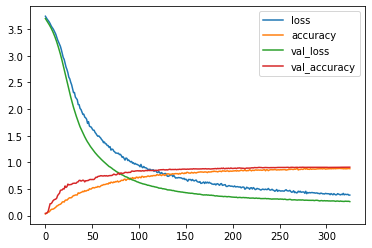

In [41]:
model_loss.plot()

In [37]:
import pickle

In [52]:
pickle.dump(model,open("Saved Models/classify-minerals.sav",'wb'))

INFO:tensorflow:Assets written to: ram://a65a899d-38ce-4005-a917-820eb62e4119/assets


# REGRESSION MODEL

In [15]:
X

,METALLOGEN,LOCALITY,STATE,TOPOSHEET,MINERAL_OR,HOSTROCK_TYPE1,HOSTROCK_TYPE2,HOSTROCK_TYPE3,HOSTROCK_TYPE4,MORPH-STRATABOUND,...,MORPH-DISCORDANT,MORPH-LENSOID,MORPH-RESIDUAL,MORPH-VEIN,MORPH-REMOBILISED,MORPH-MAGMATIC,MORPH-QUARTZ,MORPH-VOLCANIC,MORPH-OTHER,RESERVE_AMT
0,32,21,9,59,8,82,0,0,0,0,...,0,0,1,0,0,0,0,0,0,38146.00
1,94,256,9,43,35,50,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2.63
2,85,247,4,57,10,122,0,0,0,0,...,0,0,0,0,0,1,0,0,0,123283.00
3,23,135,9,57,24,10,63,0,0,0,...,0,0,0,0,0,0,0,1,0,3.00
4,23,204,4,57,24,10,62,7,0,0,...,0,0,0,0,0,0,0,1,0,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3313,108,124,10,4,41,40,28,0,0,1,...,0,0,0,0,0,0,0,0,0,1.68
3314,108,124,10,4,41,40,28,0,0,1,...,0,0,0,0,0,0,0,0,0,1.68
3315,108,124,10,4,41,40,28,0,0,1,...,0,0,0,0,0,0,0,0,0,1.68
3316,108,124,10,4,41,40,28,0,0,1,...,0,0,0,0,0,0,0,0,0,1.68


In [16]:
x = X.drop(["RESERVE_AMT"],axis=1).values
y = X["RESERVE_AMT"].values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=42)
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
# We dont fit to our test set
X_test = scaler.transform(X_test)
import tensorflow as tf
#Lets take a look at the shape of the feature data
X_train.shape

(2322, 23)

In [22]:
model = tf.keras.models.Sequential()
# No. of neurons = Size of our feature data
model.add(tf.keras.layers.Dense(23,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(12,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(6,activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
# This may over fit the training data
# We will able to check it by passing the validation data along with our training data
model.add(tf.keras.layers.Dense(1))
# adam optimizer is a good opitmizer
# Since a regression problem, and we choosing a continuous label i.e price,loss = 'mse'
model.compile(optimizer='adam',loss='mse')

In [23]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode='min',verbose=1,patience=50)

In [24]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=5000,callbacks=[early_stop])

Epoch 1/5000
19/19 [==============================] - 0s 7ms/step - loss: 1536034387001344.0000 - val_loss: 839711471960064.0000
Epoch 2/5000
19/19 [==============================] - 0s 3ms/step - loss: 1536034387001344.0000 - val_loss: 839711471960064.0000
Epoch 3/5000
19/19 [==============================] - 0s 4ms/step - loss: 1536034521219072.0000 - val_loss: 839711471960064.0000
Epoch 4/5000
19/19 [==============================] - 0s 3ms/step - loss: 1536034387001344.0000 - val_loss: 839711471960064.0000
Epoch 5/5000
19/19 [==============================] - 0s 3ms/step - loss: 1536034655436800.0000 - val_loss: 839711471960064.0000
Epoch 6/5000
19/19 [==============================] - 0s 3ms/step - loss: 1536034521219072.0000 - val_loss: 839711471960064.0000
Epoch 7/5000
19/19 [==============================] - 0s 3ms/step - loss: 1536034387001344.0000 - val_loss: 839711471960064.0000
Epoch 8/5000
19/19 [==============================] - 0s 3ms/step - loss: 1536034387001344.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 1535300350246912.0000 - val_loss: 839278284242944.0000
Epoch 65/5000
19/19 [==============================] - 0s 3ms/step - loss: 1535174588235776.0000 - val_loss: 839249897193472.0000
Epoch 66/5000
19/19 [==============================] - 0s 3ms/step - loss: 1535241831317504.0000 - val_loss: 839221845688320.0000
Epoch 67/5000
19/19 [==============================] - 0s 3ms/step - loss: 1535128954208256.0000 - val_loss: 839191512481792.0000
Epoch 68/5000
19/19 [==============================] - 0s 3ms/step - loss: 1535160495374336.0000 - val_loss: 839155475021824.0000
Epoch 69/5000
19/19 [==============================] - 0s 3ms/step - loss: 1535010976825344.0000 - val_loss: 839124135182336.0000
Epoch 70/5000
19/19 [==============================] - 0s 3ms/step - loss: 1535028693565440.0000 - val_loss: 839089305681920.0000
Epoch 71/5000
19/19 [==============================] - 0s 3ms/step - loss: 1534926017003520.0000 - val_l

Epoch 127/5000
19/19 [==============================] - 0s 3ms/step - loss: 1524845326106624.0000 - val_loss: 833937895063552.0000
Epoch 128/5000
19/19 [==============================] - 0s 3ms/step - loss: 1525228249284608.0000 - val_loss: 833789450256384.0000
Epoch 129/5000
19/19 [==============================] - 0s 3ms/step - loss: 1525525004681216.0000 - val_loss: 833643018715136.0000
Epoch 130/5000
19/19 [==============================] - 0s 3ms/step - loss: 1525912893915136.0000 - val_loss: 833499875508224.0000
Epoch 131/5000
19/19 [==============================] - 0s 3ms/step - loss: 1524964511449088.0000 - val_loss: 833366261760000.0000
Epoch 132/5000
19/19 [==============================] - 0s 3ms/step - loss: 1525738410868736.0000 - val_loss: 833193859088384.0000
Epoch 133/5000
19/19 [==============================] - 0s 2ms/step - loss: 1525003568807936.0000 - val_loss: 833042931253248.0000
Epoch 134/5000
19/19 [==============================] - 0s 3ms/step - loss: 1524541

19/19 [==============================] - 0s 3ms/step - loss: 1503731266879488.0000 - val_loss: 821465041600512.0000
Epoch 190/5000
19/19 [==============================] - 0s 3ms/step - loss: 1498862116143104.0000 - val_loss: 821197478559744.0000
Epoch 191/5000
19/19 [==============================] - 0s 2ms/step - loss: 1500915647381504.0000 - val_loss: 820924949463040.0000
Epoch 192/5000
19/19 [==============================] - 0s 3ms/step - loss: 1499572664795136.0000 - val_loss: 820668459384832.0000
Epoch 193/5000
19/19 [==============================] - 0s 3ms/step - loss: 1502590013538304.0000 - val_loss: 820432773054464.0000
Epoch 194/5000
19/19 [==============================] - 0s 3ms/step - loss: 1498360544493568.0000 - val_loss: 820179235766272.0000
Epoch 195/5000
19/19 [==============================] - 0s 3ms/step - loss: 1495016375582720.0000 - val_loss: 819928986812416.0000
Epoch 196/5000
19/19 [==============================] - 0s 3ms/step - loss: 1496034953920512.0000 

19/19 [==============================] - 0s 3ms/step - loss: 1463858132680704.0000 - val_loss: 803959895752704.0000
Epoch 252/5000
19/19 [==============================] - 0s 2ms/step - loss: 1461514020061184.0000 - val_loss: 803640591777792.0000
Epoch 253/5000
19/19 [==============================] - 0s 3ms/step - loss: 1466051384573952.0000 - val_loss: 803278807891968.0000
Epoch 254/5000
19/19 [==============================] - 0s 3ms/step - loss: 1470966035120128.0000 - val_loss: 802965677932544.0000
Epoch 255/5000
19/19 [==============================] - 0s 2ms/step - loss: 1465520553459712.0000 - val_loss: 802678586212352.0000
Epoch 256/5000
19/19 [==============================] - 0s 3ms/step - loss: 1459221983920128.0000 - val_loss: 802378945134592.0000
Epoch 257/5000
19/19 [==============================] - 0s 3ms/step - loss: 1463589026136064.0000 - val_loss: 802051722313728.0000
Epoch 258/5000
19/19 [==============================] - 0s 3ms/step - loss: 1452701149822976.0000 

19/19 [==============================] - 0s 3ms/step - loss: 1452699404992512.0000 - val_loss: 784523222581248.0000
Epoch 314/5000
19/19 [==============================] - 0s 3ms/step - loss: 1434567529463808.0000 - val_loss: 784253176512512.0000
Epoch 315/5000
19/19 [==============================] - 0s 3ms/step - loss: 1426209523105792.0000 - val_loss: 783952528801792.0000
Epoch 316/5000
19/19 [==============================] - 0s 3ms/step - loss: 1412834592292864.0000 - val_loss: 783591550222336.0000
Epoch 317/5000
19/19 [==============================] - 0s 3ms/step - loss: 1439813160927232.0000 - val_loss: 783326872862720.0000
Epoch 318/5000
19/19 [==============================] - 0s 3ms/step - loss: 1424050094080000.0000 - val_loss: 783003408138240.0000
Epoch 319/5000
19/19 [==============================] - 0s 2ms/step - loss: 1422765093552128.0000 - val_loss: 782682963312640.0000
Epoch 320/5000
19/19 [==============================] - 0s 3ms/step - loss: 1411212973703168.0000 

19/19 [==============================] - 0s 3ms/step - loss: 1365990994608128.0000 - val_loss: 764019048710144.0000
Epoch 376/5000
19/19 [==============================] - 0s 3ms/step - loss: 1401707003117568.0000 - val_loss: 763647064276992.0000
Epoch 377/5000
19/19 [==============================] - 0s 3ms/step - loss: 1374728702918656.0000 - val_loss: 763305614376960.0000
Epoch 378/5000
19/19 [==============================] - 0s 4ms/step - loss: 1373342502223872.0000 - val_loss: 762968727879680.0000
Epoch 379/5000
19/19 [==============================] - 0s 3ms/step - loss: 1398459068317696.0000 - val_loss: 762573993541632.0000
Epoch 380/5000
19/19 [==============================] - 0s 3ms/step - loss: 1381989613568000.0000 - val_loss: 762253347389440.0000
Epoch 381/5000
19/19 [==============================] - 0s 3ms/step - loss: 1375962029621248.0000 - val_loss: 761915588476928.0000
Epoch 382/5000
19/19 [==============================] - 0s 3ms/step - loss: 1411830643687424.0000 

19/19 [==============================] - 0s 3ms/step - loss: 1337618172215296.0000 - val_loss: 742308593008640.0000
Epoch 438/5000
19/19 [==============================] - 0s 3ms/step - loss: 1346648609390592.0000 - val_loss: 741930166124544.0000
Epoch 439/5000
19/19 [==============================] - 0s 3ms/step - loss: 1367200027901952.0000 - val_loss: 741569120436224.0000
Epoch 440/5000
19/19 [==============================] - 0s 3ms/step - loss: 1330530939305984.0000 - val_loss: 741206464135168.0000
Epoch 441/5000
19/19 [==============================] - 0s 2ms/step - loss: 1326904778948608.0000 - val_loss: 740813071974400.0000
Epoch 442/5000
19/19 [==============================] - 0s 2ms/step - loss: 1347296209928192.0000 - val_loss: 740461018873856.0000
Epoch 443/5000
19/19 [==============================] - 0s 3ms/step - loss: 1357108868022272.0000 - val_loss: 740128293126144.0000
Epoch 444/5000
19/19 [==============================] - 0s 3ms/step - loss: 1340190186536960.0000 

19/19 [==============================] - 0s 4ms/step - loss: 1335393916026880.0000 - val_loss: 719023763357696.0000
Epoch 500/5000
19/19 [==============================] - 0s 3ms/step - loss: 1311965808951296.0000 - val_loss: 718671643148288.0000
Epoch 501/5000
19/19 [==============================] - 0s 3ms/step - loss: 1271023362113536.0000 - val_loss: 718305094533120.0000
Epoch 502/5000
19/19 [==============================] - 0s 2ms/step - loss: 1305919434522624.0000 - val_loss: 717941498707968.0000
Epoch 503/5000
19/19 [==============================] - 0s 3ms/step - loss: 1287851580850176.0000 - val_loss: 717565219307520.0000
Epoch 504/5000
19/19 [==============================] - 0s 3ms/step - loss: 1325373354672128.0000 - val_loss: 717200616849408.0000
Epoch 505/5000
19/19 [==============================] - 0s 3ms/step - loss: 1297271383654400.0000 - val_loss: 716823330816000.0000
Epoch 506/5000
19/19 [==============================] - 0s 3ms/step - loss: 1303337353871360.0000 

19/19 [==============================] - 0s 3ms/step - loss: 1248522431102976.0000 - val_loss: 694616537956352.0000
Epoch 562/5000
19/19 [==============================] - 0s 2ms/step - loss: 1188288601784320.0000 - val_loss: 694182142279680.0000
Epoch 563/5000
19/19 [==============================] - 0s 2ms/step - loss: 1217165948616704.0000 - val_loss: 693723855847424.0000
Epoch 564/5000
19/19 [==============================] - 0s 2ms/step - loss: 1254124544851968.0000 - val_loss: 693292010307584.0000
Epoch 565/5000
19/19 [==============================] - 0s 2ms/step - loss: 1238011035516928.0000 - val_loss: 692871036403712.0000
Epoch 566/5000
19/19 [==============================] - 0s 3ms/step - loss: 1279982529675264.0000 - val_loss: 692497911119872.0000
Epoch 567/5000
19/19 [==============================] - 0s 2ms/step - loss: 1265092683366400.0000 - val_loss: 692091902492672.0000
Epoch 568/5000
19/19 [==============================] - 0s 2ms/step - loss: 1224096012566528.0000 

19/19 [==============================] - 0s 3ms/step - loss: 1178650829389824.0000 - val_loss: 669069804044288.0000
Epoch 624/5000
19/19 [==============================] - 0s 3ms/step - loss: 1173186825682944.0000 - val_loss: 668660641300480.0000
Epoch 625/5000
19/19 [==============================] - 0s 3ms/step - loss: 1216738867806208.0000 - val_loss: 668256243286016.0000
Epoch 626/5000
19/19 [==============================] - 0s 3ms/step - loss: 1200404436090880.0000 - val_loss: 667846006800384.0000
Epoch 627/5000
19/19 [==============================] - 0s 3ms/step - loss: 1200179352961024.0000 - val_loss: 667461003247616.0000
Epoch 628/5000
19/19 [==============================] - 0s 2ms/step - loss: 1236598528147456.0000 - val_loss: 667040431996928.0000
Epoch 629/5000
19/19 [==============================] - 0s 3ms/step - loss: 1203069463298048.0000 - val_loss: 666574629371904.0000
Epoch 630/5000
19/19 [==============================] - 0s 2ms/step - loss: 1208699494334464.0000 

19/19 [==============================] - 0s 3ms/step - loss: 1116217708380160.0000 - val_loss: 644353206779904.0000
Epoch 686/5000
19/19 [==============================] - 0s 3ms/step - loss: 1207744132546560.0000 - val_loss: 643955116998656.0000
Epoch 687/5000
19/19 [==============================] - 0s 2ms/step - loss: 1189419923013632.0000 - val_loss: 643587360423936.0000
Epoch 688/5000
19/19 [==============================] - 0s 2ms/step - loss: 1154289372233728.0000 - val_loss: 643234703343616.0000
Epoch 689/5000
19/19 [==============================] - 0s 3ms/step - loss: 1155277080494080.0000 - val_loss: 642852249927680.0000
Epoch 690/5000
19/19 [==============================] - 0s 2ms/step - loss: 1106564702273536.0000 - val_loss: 642459864399872.0000
Epoch 691/5000
19/19 [==============================] - 0s 3ms/step - loss: 1098427148533760.0000 - val_loss: 642064391864320.0000
Epoch 692/5000
19/19 [==============================] - 0s 3ms/step - loss: 1210002614255616.0000 

19/19 [==============================] - 0s 3ms/step - loss: 1160362858643456.0000 - val_loss: 620529627168768.0000
Epoch 748/5000
19/19 [==============================] - 0s 3ms/step - loss: 1112736100515840.0000 - val_loss: 620196163223552.0000
Epoch 749/5000
19/19 [==============================] - 0s 4ms/step - loss: 1092830739038208.0000 - val_loss: 619826326274048.0000
Epoch 750/5000
19/19 [==============================] - 0s 3ms/step - loss: 1134109199958016.0000 - val_loss: 619448033607680.0000
Epoch 751/5000
19/19 [==============================] - 0s 2ms/step - loss: 1155665640816640.0000 - val_loss: 619099268841472.0000
Epoch 752/5000
19/19 [==============================] - 0s 3ms/step - loss: 1164399456813056.0000 - val_loss: 618723190767616.0000
Epoch 753/5000
19/19 [==============================] - 0s 3ms/step - loss: 1151689306406912.0000 - val_loss: 618390263693312.0000
Epoch 754/5000
19/19 [==============================] - 0s 3ms/step - loss: 1183769759318016.0000 

19/19 [==============================] - 0s 3ms/step - loss: 1065933439238144.0000 - val_loss: 599519049809920.0000
Epoch 810/5000
19/19 [==============================] - 0s 3ms/step - loss: 1127852774785024.0000 - val_loss: 599191088791552.0000
Epoch 811/5000
19/19 [==============================] - 0s 2ms/step - loss: 1104336419553280.0000 - val_loss: 598875140259840.0000
Epoch 812/5000
19/19 [==============================] - 0s 2ms/step - loss: 1072002496462848.0000 - val_loss: 598559191728128.0000
Epoch 813/5000
19/19 [==============================] - 0s 3ms/step - loss: 1065966591016960.0000 - val_loss: 598235190132736.0000
Epoch 814/5000
19/19 [==============================] - 0s 3ms/step - loss: 1073042952290304.0000 - val_loss: 597911456972800.0000
Epoch 815/5000
19/19 [==============================] - 0s 2ms/step - loss: 1102056060354560.0000 - val_loss: 597586448744448.0000
Epoch 816/5000
19/19 [==============================] - 0s 3ms/step - loss: 984923108278272.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 1065560783716352.0000 - val_loss: 580813930364928.0000
Epoch 872/5000
19/19 [==============================] - 0s 3ms/step - loss: 1049793421901824.0000 - val_loss: 580545159364608.0000
Epoch 873/5000
19/19 [==============================] - 0s 3ms/step - loss: 1054753035386880.0000 - val_loss: 580244847198208.0000
Epoch 874/5000
19/19 [==============================] - 0s 3ms/step - loss: 1106119837614080.0000 - val_loss: 579995202224128.0000
Epoch 875/5000
19/19 [==============================] - 0s 3ms/step - loss: 989729780662272.0000 - val_loss: 579706365673472.0000
Epoch 876/5000
19/19 [==============================] - 0s 3ms/step - loss: 1066947923935232.0000 - val_loss: 579432091746304.0000
Epoch 877/5000
19/19 [==============================] - 0s 3ms/step - loss: 964338873532416.0000 - val_loss: 579138490466304.0000
Epoch 878/5000
19/19 [==============================] - 0s 3ms/step - loss: 978310133710848.0000 - v

Epoch 934/5000
19/19 [==============================] - 0s 3ms/step - loss: 1036020401307648.0000 - val_loss: 565261518241792.0000
Epoch 935/5000
19/19 [==============================] - 0s 2ms/step - loss: 1042268504981504.0000 - val_loss: 565038314160128.0000
Epoch 936/5000
19/19 [==============================] - 0s 3ms/step - loss: 1012363855659008.0000 - val_loss: 564826988347392.0000
Epoch 937/5000
19/19 [==============================] - 0s 3ms/step - loss: 1036717662404608.0000 - val_loss: 564584322695168.0000
Epoch 938/5000
19/19 [==============================] - 0s 3ms/step - loss: 1018219842240512.0000 - val_loss: 564377426067456.0000
Epoch 939/5000
19/19 [==============================] - 0s 2ms/step - loss: 1105263931162624.0000 - val_loss: 564184286756864.0000
Epoch 940/5000
19/19 [==============================] - 0s 3ms/step - loss: 981042403999744.0000 - val_loss: 563984704995328.0000
Epoch 941/5000
19/19 [==============================] - 0s 3ms/step - loss: 10243642

19/19 [==============================] - 0s 3ms/step - loss: 925498544750592.0000 - val_loss: 552853189951488.0000
Epoch 997/5000
19/19 [==============================] - 0s 3ms/step - loss: 1030502509182976.0000 - val_loss: 552701658136576.0000
Epoch 998/5000
19/19 [==============================] - 0s 3ms/step - loss: 980301186596864.0000 - val_loss: 552521705717760.0000
Epoch 999/5000
19/19 [==============================] - 0s 3ms/step - loss: 1078205301653504.0000 - val_loss: 552304642097152.0000
Epoch 1000/5000
19/19 [==============================] - 0s 3ms/step - loss: 1036836646420480.0000 - val_loss: 552144654565376.0000
Epoch 1001/5000
19/19 [==============================] - 0s 3ms/step - loss: 1014276256956416.0000 - val_loss: 551935006474240.0000
Epoch 1002/5000
19/19 [==============================] - 0s 3ms/step - loss: 992250590920704.0000 - val_loss: 551751799275520.0000
Epoch 1003/5000
19/19 [==============================] - 0s 3ms/step - loss: 964256329629696.0000 

19/19 [==============================] - 0s 2ms/step - loss: 1040365767360512.0000 - val_loss: 542628315660288.0000
Epoch 1059/5000
19/19 [==============================] - 0s 2ms/step - loss: 952970095099904.0000 - val_loss: 542497822474240.0000
Epoch 1060/5000
19/19 [==============================] - 0s 3ms/step - loss: 971612669083648.0000 - val_loss: 542366087774208.0000
Epoch 1061/5000
19/19 [==============================] - 0s 2ms/step - loss: 943218304745472.0000 - val_loss: 542229219246080.0000
Epoch 1062/5000
19/19 [==============================] - 0s 2ms/step - loss: 984683395416064.0000 - val_loss: 542082989031424.0000
Epoch 1063/5000
19/19 [==============================] - 0s 3ms/step - loss: 1046257522966528.0000 - val_loss: 541959005405184.0000
Epoch 1064/5000
19/19 [==============================] - 0s 3ms/step - loss: 939937755037696.0000 - val_loss: 541811399458816.0000
Epoch 1065/5000
19/19 [==============================] - 0s 3ms/step - loss: 985728146210816.0000

19/19 [==============================] - 0s 2ms/step - loss: 1017587341197312.0000 - val_loss: 533647975251968.0000
Epoch 1121/5000
19/19 [==============================] - 0s 3ms/step - loss: 985643656151040.0000 - val_loss: 533536004112384.0000
Epoch 1122/5000
19/19 [==============================] - 0s 3ms/step - loss: 1029636200857600.0000 - val_loss: 533372896018432.0000
Epoch 1123/5000
19/19 [==============================] - 0s 3ms/step - loss: 989719445897216.0000 - val_loss: 533237302558720.0000
Epoch 1124/5000
19/19 [==============================] - 0s 2ms/step - loss: 1050071588143104.0000 - val_loss: 533142813278208.0000
Epoch 1125/5000
19/19 [==============================] - 0s 3ms/step - loss: 902574827896832.0000 - val_loss: 533013494497280.0000
Epoch 1126/5000
19/19 [==============================] - 0s 3ms/step - loss: 950746040238080.0000 - val_loss: 532856761745408.0000
Epoch 1127/5000
19/19 [==============================] - 0s 3ms/step - loss: 970747367391232.000

19/19 [==============================] - 0s 3ms/step - loss: 916552194981888.0000 - val_loss: 524859499085824.0000
Epoch 1183/5000
19/19 [==============================] - 0s 3ms/step - loss: 962278295863296.0000 - val_loss: 524733435084800.0000
Epoch 1184/5000
19/19 [==============================] - 0s 3ms/step - loss: 1052611188883456.0000 - val_loss: 524590224769024.0000
Epoch 1185/5000
19/19 [==============================] - 0s 4ms/step - loss: 981264064577536.0000 - val_loss: 524428525961216.0000
Epoch 1186/5000
19/19 [==============================] - 0s 3ms/step - loss: 895354652327936.0000 - val_loss: 524284912992256.0000
Epoch 1187/5000
19/19 [==============================] - 0s 3ms/step - loss: 946521134596096.0000 - val_loss: 524152809193472.0000
Epoch 1188/5000
19/19 [==============================] - 0s 2ms/step - loss: 975124878589952.0000 - val_loss: 524017786159104.0000
Epoch 1189/5000
19/19 [==============================] - 0s 3ms/step - loss: 965682258771968.0000 

19/19 [==============================] - 0s 3ms/step - loss: 1013262846001152.0000 - val_loss: 516566185672704.0000
Epoch 1245/5000
19/19 [==============================] - 0s 2ms/step - loss: 870804485046272.0000 - val_loss: 516432001499136.0000
Epoch 1246/5000
19/19 [==============================] - 0s 3ms/step - loss: 935027063914496.0000 - val_loss: 516310433792000.0000
Epoch 1247/5000
19/19 [==============================] - 0s 3ms/step - loss: 890931238666240.0000 - val_loss: 516179839942656.0000
Epoch 1248/5000
19/19 [==============================] - 0s 2ms/step - loss: 1019926420652032.0000 - val_loss: 516050420498432.0000
Epoch 1249/5000
19/19 [==============================] - 0s 3ms/step - loss: 975092733444096.0000 - val_loss: 515937241399296.0000
Epoch 1250/5000
19/19 [==============================] - 0s 3ms/step - loss: 883968492699648.0000 - val_loss: 515803694759936.0000
Epoch 1251/5000
19/19 [==============================] - 0s 3ms/step - loss: 935957058551808.0000

19/19 [==============================] - 0s 2ms/step - loss: 844128577388544.0000 - val_loss: 508600296407040.0000
Epoch 1307/5000
19/19 [==============================] - 0s 3ms/step - loss: 981640411086848.0000 - val_loss: 508460340871168.0000
Epoch 1308/5000
19/19 [==============================] - 0s 3ms/step - loss: 897157129306112.0000 - val_loss: 508338102075392.0000
Epoch 1309/5000
19/19 [==============================] - 0s 3ms/step - loss: 931382247292928.0000 - val_loss: 508214219112448.0000
Epoch 1310/5000
19/19 [==============================] - 0s 3ms/step - loss: 909448855945216.0000 - val_loss: 508071109459968.0000
Epoch 1311/5000
19/19 [==============================] - 0s 3ms/step - loss: 1013975005265920.0000 - val_loss: 507934912020480.0000
Epoch 1312/5000
19/19 [==============================] - 0s 3ms/step - loss: 931865900875776.0000 - val_loss: 507802506231808.0000
Epoch 1313/5000
19/19 [==============================] - 0s 3ms/step - loss: 991162152255488.0000 

19/19 [==============================] - 0s 3ms/step - loss: 922989142999040.0000 - val_loss: 500239102377984.0000
Epoch 1369/5000
19/19 [==============================] - 0s 3ms/step - loss: 902526643732480.0000 - val_loss: 500107300569088.0000
Epoch 1370/5000
19/19 [==============================] - 0s 3ms/step - loss: 855526615285760.0000 - val_loss: 499977679798272.0000
Epoch 1371/5000
19/19 [==============================] - 0s 3ms/step - loss: 806247368491008.0000 - val_loss: 499827322388480.0000
Epoch 1372/5000
19/19 [==============================] - 0s 3ms/step - loss: 1006513506222080.0000 - val_loss: 499677636067328.0000
Epoch 1373/5000
19/19 [==============================] - 0s 3ms/step - loss: 859371282104320.0000 - val_loss: 499547713306624.0000
Epoch 1374/5000
19/19 [==============================] - 0s 4ms/step - loss: 864596445364224.0000 - val_loss: 499419602485248.0000
Epoch 1375/5000
19/19 [==============================] - 0s 4ms/step - loss: 974379299110912.0000 

19/19 [==============================] - 0s 3ms/step - loss: 901672683438080.0000 - val_loss: 491964982099968.0000
Epoch 1431/5000
19/19 [==============================] - 0s 3ms/step - loss: 876468607385600.0000 - val_loss: 491820228280320.0000
Epoch 1432/5000
19/19 [==============================] - 0s 3ms/step - loss: 852584025817088.0000 - val_loss: 491691815469056.0000
Epoch 1433/5000
19/19 [==============================] - 0s 3ms/step - loss: 953243697938432.0000 - val_loss: 491562463133696.0000
Epoch 1434/5000
19/19 [==============================] - 0s 3ms/step - loss: 913290569973760.0000 - val_loss: 491435493163008.0000
Epoch 1435/5000
19/19 [==============================] - 0s 3ms/step - loss: 879280267460608.0000 - val_loss: 491306946134016.0000
Epoch 1436/5000
19/19 [==============================] - 0s 3ms/step - loss: 942073695961088.0000 - val_loss: 491171520446464.0000
Epoch 1437/5000
19/19 [==============================] - 0s 3ms/step - loss: 901478671712256.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 834733604864000.0000 - val_loss: 483527116193792.0000
Epoch 1493/5000
19/19 [==============================] - 0s 3ms/step - loss: 768244155678720.0000 - val_loss: 483390079893504.0000
Epoch 1494/5000
19/19 [==============================] - 0s 3ms/step - loss: 836142823899136.0000 - val_loss: 483243883233280.0000
Epoch 1495/5000
19/19 [==============================] - 0s 3ms/step - loss: 887801214140416.0000 - val_loss: 483099230076928.0000
Epoch 1496/5000
19/19 [==============================] - 0s 3ms/step - loss: 891493678055424.0000 - val_loss: 482945349451776.0000
Epoch 1497/5000
19/19 [==============================] - 0s 3ms/step - loss: 861159263567872.0000 - val_loss: 482778416152576.0000
Epoch 1498/5000
19/19 [==============================] - 0s 3ms/step - loss: 802257008328704.0000 - val_loss: 482611986169856.0000
Epoch 1499/5000
19/19 [==============================] - 0s 3ms/step - loss: 907898909622272.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 878010836189184.0000 - val_loss: 474444636094464.0000
Epoch 1555/5000
19/19 [==============================] - 0s 3ms/step - loss: 901806699839488.0000 - val_loss: 474319880716288.0000
Epoch 1556/5000
19/19 [==============================] - 0s 3ms/step - loss: 865743201632256.0000 - val_loss: 474178113241088.0000
Epoch 1557/5000
19/19 [==============================] - 0s 2ms/step - loss: 881051404599296.0000 - val_loss: 474028326256640.0000
Epoch 1558/5000
19/19 [==============================] - 0s 2ms/step - loss: 817816064229376.0000 - val_loss: 473870083555328.0000
Epoch 1559/5000
19/19 [==============================] - 0s 3ms/step - loss: 757491033964544.0000 - val_loss: 473707445223424.0000
Epoch 1560/5000
19/19 [==============================] - 0s 3ms/step - loss: 1048153818136576.0000 - val_loss: 473556718714880.0000
Epoch 1561/5000
19/19 [==============================] - 0s 3ms/step - loss: 803314912460800.0000 

19/19 [==============================] - 0s 3ms/step - loss: 787984899112960.0000 - val_loss: 465023021350912.0000
Epoch 1617/5000
19/19 [==============================] - 0s 3ms/step - loss: 1002035667271680.0000 - val_loss: 464850685788160.0000
Epoch 1618/5000
19/19 [==============================] - 0s 2ms/step - loss: 822640319135744.0000 - val_loss: 464694993223680.0000
Epoch 1619/5000
19/19 [==============================] - 0s 3ms/step - loss: 907263858442240.0000 - val_loss: 464527489499136.0000
Epoch 1620/5000
19/19 [==============================] - 0s 3ms/step - loss: 856512176062464.0000 - val_loss: 464395687690240.0000
Epoch 1621/5000
19/19 [==============================] - 0s 3ms/step - loss: 916166319013888.0000 - val_loss: 464242243272704.0000
Epoch 1622/5000
19/19 [==============================] - 0s 3ms/step - loss: 861966516092928.0000 - val_loss: 464093127376896.0000
Epoch 1623/5000
19/19 [==============================] - 0s 3ms/step - loss: 960049476272128.0000 

19/19 [==============================] - 0s 3ms/step - loss: 803281559355392.0000 - val_loss: 454687685869568.0000
Epoch 1679/5000
19/19 [==============================] - 0s 3ms/step - loss: 884022716661760.0000 - val_loss: 454532731502592.0000
Epoch 1680/5000
19/19 [==============================] - 0s 3ms/step - loss: 707897382141952.0000 - val_loss: 454368247676928.0000
Epoch 1681/5000
19/19 [==============================] - 0s 3ms/step - loss: 800780546211840.0000 - val_loss: 454170343636992.0000
Epoch 1682/5000
19/19 [==============================] - 0s 3ms/step - loss: 840828163457024.0000 - val_loss: 453996162580480.0000
Epoch 1683/5000
19/19 [==============================] - 0s 2ms/step - loss: 862353331585024.0000 - val_loss: 453815203528704.0000
Epoch 1684/5000
19/19 [==============================] - 0s 3ms/step - loss: 819242060480512.0000 - val_loss: 453644411469824.0000
Epoch 1685/5000
19/19 [==============================] - 0s 3ms/step - loss: 786921089400832.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 835867342012416.0000 - val_loss: 443600227794944.0000
Epoch 1741/5000
19/19 [==============================] - 0s 3ms/step - loss: 809300553367552.0000 - val_loss: 443404370575360.0000
Epoch 1742/5000
19/19 [==============================] - 0s 4ms/step - loss: 890539792662528.0000 - val_loss: 443211533254656.0000
Epoch 1743/5000
19/19 [==============================] - 0s 3ms/step - loss: 852768843628544.0000 - val_loss: 443004200419328.0000
Epoch 1744/5000
19/19 [==============================] - 0s 3ms/step - loss: 786683389804544.0000 - val_loss: 442812101296128.0000
Epoch 1745/5000
19/19 [==============================] - 0s 3ms/step - loss: 773275374321664.0000 - val_loss: 442613526167552.0000
Epoch 1746/5000
19/19 [==============================] - 0s 3ms/step - loss: 763605590999040.0000 - val_loss: 442426963525632.0000
Epoch 1747/5000
19/19 [==============================] - 0s 3ms/step - loss: 846431485165568.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 779395232956416.0000 - val_loss: 431588613554176.0000
Epoch 1803/5000
19/19 [==============================] - 0s 3ms/step - loss: 886280393064448.0000 - val_loss: 431380810956800.0000
Epoch 1804/5000
19/19 [==============================] - 0s 3ms/step - loss: 888960519766016.0000 - val_loss: 431189986902016.0000
Epoch 1805/5000
19/19 [==============================] - 0s 3ms/step - loss: 738644516143104.0000 - val_loss: 430970440253440.0000
Epoch 1806/5000
19/19 [==============================] - 0s 3ms/step - loss: 794947242426368.0000 - val_loss: 430758174916608.0000
Epoch 1807/5000
19/19 [==============================] - 0s 3ms/step - loss: 761826333687808.0000 - val_loss: 430582450356224.0000
Epoch 1808/5000
19/19 [==============================] - 0s 2ms/step - loss: 843170329919488.0000 - val_loss: 430377499885568.0000
Epoch 1809/5000
19/19 [==============================] - 0s 3ms/step - loss: 907788448432128.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 826519614128128.0000 - val_loss: 418741896609792.0000
Epoch 1865/5000
19/19 [==============================] - 0s 3ms/step - loss: 824491047387136.0000 - val_loss: 418527752224768.0000
Epoch 1866/5000
19/19 [==============================] - 0s 2ms/step - loss: 682606936981504.0000 - val_loss: 418322566873088.0000
Epoch 1867/5000
19/19 [==============================] - 0s 2ms/step - loss: 718423810113536.0000 - val_loss: 418107751399424.0000
Epoch 1868/5000
19/19 [==============================] - 0s 2ms/step - loss: 643931360460800.0000 - val_loss: 417851059994624.0000
Epoch 1869/5000
19/19 [==============================] - 0s 2ms/step - loss: 821237072789504.0000 - val_loss: 417647988572160.0000
Epoch 1870/5000
19/19 [==============================] - 0s 2ms/step - loss: 742701716733952.0000 - val_loss: 417461727920128.0000
Epoch 1871/5000
19/19 [==============================] - 0s 3ms/step - loss: 881267696467968.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 791783126597632.0000 - val_loss: 405059070328832.0000
Epoch 1927/5000
19/19 [==============================] - 0s 2ms/step - loss: 827664222912512.0000 - val_loss: 404861669605376.0000
Epoch 1928/5000
19/19 [==============================] - 0s 3ms/step - loss: 711356709863424.0000 - val_loss: 404642391392256.0000
Epoch 1929/5000
19/19 [==============================] - 0s 3ms/step - loss: 760631863017472.0000 - val_loss: 404426837721088.0000
Epoch 1930/5000
19/19 [==============================] - 0s 3ms/step - loss: 727390426759168.0000 - val_loss: 404224437387264.0000
Epoch 1931/5000
19/19 [==============================] - 0s 2ms/step - loss: 715334252232704.0000 - val_loss: 403996435021824.0000
Epoch 1932/5000
19/19 [==============================] - 0s 2ms/step - loss: 711479451975680.0000 - val_loss: 403796517715968.0000
Epoch 1933/5000
19/19 [==============================] - 0s 2ms/step - loss: 743252948942848.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 790076078424064.0000 - val_loss: 391034257276928.0000
Epoch 1989/5000
19/19 [==============================] - 0s 2ms/step - loss: 787010813952000.0000 - val_loss: 390778169851904.0000
Epoch 1990/5000
19/19 [==============================] - 0s 2ms/step - loss: 826387745210368.0000 - val_loss: 390561710211072.0000
Epoch 1991/5000
19/19 [==============================] - 0s 3ms/step - loss: 656081957158912.0000 - val_loss: 390319648538624.0000
Epoch 1992/5000
19/19 [==============================] - 0s 3ms/step - loss: 696758854221824.0000 - val_loss: 390076412461056.0000
Epoch 1993/5000
19/19 [==============================] - 0s 3ms/step - loss: 776941263126528.0000 - val_loss: 389815895851008.0000
Epoch 1994/5000
19/19 [==============================] - 0s 3ms/step - loss: 794466474524672.0000 - val_loss: 389553164648448.0000
Epoch 1995/5000
19/19 [==============================] - 0s 3ms/step - loss: 699671915790336.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 687386161840128.0000 - val_loss: 375820577144832.0000
Epoch 2051/5000
19/19 [==============================] - 0s 3ms/step - loss: 693989405622272.0000 - val_loss: 375596936855552.0000
Epoch 2052/5000
19/19 [==============================] - 0s 4ms/step - loss: 700637612343296.0000 - val_loss: 375345043734528.0000
Epoch 2053/5000
19/19 [==============================] - 0s 3ms/step - loss: 748919420092416.0000 - val_loss: 375129087410176.0000
Epoch 2054/5000
19/19 [==============================] - 0s 3ms/step - loss: 743676405874688.0000 - val_loss: 374886321094656.0000
Epoch 2055/5000
19/19 [==============================] - 0s 3ms/step - loss: 740378139426816.0000 - val_loss: 374625670266880.0000
Epoch 2056/5000
19/19 [==============================] - 0s 3ms/step - loss: 667264978255872.0000 - val_loss: 374374884442112.0000
Epoch 2057/5000
19/19 [==============================] - 0s 3ms/step - loss: 724858811973632.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 750140532981760.0000 - val_loss: 360492879052800.0000
Epoch 2113/5000
19/19 [==============================] - 0s 3ms/step - loss: 716128888291328.0000 - val_loss: 360164280500224.0000
Epoch 2114/5000
19/19 [==============================] - 0s 3ms/step - loss: 605474625945600.0000 - val_loss: 359908662837248.0000
Epoch 2115/5000
19/19 [==============================] - 0s 3ms/step - loss: 701892548100096.0000 - val_loss: 359675191099392.0000
Epoch 2116/5000
19/19 [==============================] - 0s 3ms/step - loss: 761780229898240.0000 - val_loss: 359398971015168.0000
Epoch 2117/5000
19/19 [==============================] - 0s 3ms/step - loss: 666429137354752.0000 - val_loss: 359032757944320.0000
Epoch 2118/5000
19/19 [==============================] - 0s 3ms/step - loss: 704168880766976.0000 - val_loss: 358778918666240.0000
Epoch 2119/5000
19/19 [==============================] - 0s 3ms/step - loss: 643416769691648.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 717702121390080.0000 - val_loss: 343190502637568.0000
Epoch 2175/5000
19/19 [==============================] - 0s 2ms/step - loss: 727896024940544.0000 - val_loss: 342926865465344.0000
Epoch 2176/5000
19/19 [==============================] - 0s 3ms/step - loss: 706292003897344.0000 - val_loss: 342645612216320.0000
Epoch 2177/5000
19/19 [==============================] - 0s 3ms/step - loss: 719988721713152.0000 - val_loss: 342350534541312.0000
Epoch 2178/5000
19/19 [==============================] - 0s 3ms/step - loss: 773265911971840.0000 - val_loss: 342061865762816.0000
Epoch 2179/5000
19/19 [==============================] - 0s 3ms/step - loss: 719879938244608.0000 - val_loss: 341791081496576.0000
Epoch 2180/5000
19/19 [==============================] - 0s 3ms/step - loss: 757232530620416.0000 - val_loss: 341533148577792.0000
Epoch 2181/5000
19/19 [==============================] - 0s 2ms/step - loss: 683203333455872.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 732109790511104.0000 - val_loss: 325564929933312.0000
Epoch 2237/5000
19/19 [==============================] - 0s 3ms/step - loss: 694020409917440.0000 - val_loss: 325228177653760.0000
Epoch 2238/5000
19/19 [==============================] - 0s 3ms/step - loss: 667491604889600.0000 - val_loss: 324913638408192.0000
Epoch 2239/5000
19/19 [==============================] - 0s 3ms/step - loss: 631395558883328.0000 - val_loss: 324535043751936.0000
Epoch 2240/5000
19/19 [==============================] - 0s 2ms/step - loss: 676145225793536.0000 - val_loss: 324201714024448.0000
Epoch 2241/5000
19/19 [==============================] - 0s 3ms/step - loss: 716107279237120.0000 - val_loss: 323919655469056.0000
Epoch 2242/5000
19/19 [==============================] - 0s 3ms/step - loss: 678818104737792.0000 - val_loss: 323659105304576.0000
Epoch 2243/5000
19/19 [==============================] - 0s 3ms/step - loss: 614015302631424.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 645475602530304.0000 - val_loss: 307236526096384.0000
Epoch 2299/5000
19/19 [==============================] - 0s 3ms/step - loss: 646532164485120.0000 - val_loss: 306872594726912.0000
Epoch 2300/5000
19/19 [==============================] - 0s 3ms/step - loss: 685353904111616.0000 - val_loss: 306593052753920.0000
Epoch 2301/5000
19/19 [==============================] - 0s 3ms/step - loss: 675836457910272.0000 - val_loss: 306368640712704.0000
Epoch 2302/5000
19/19 [==============================] - 0s 3ms/step - loss: 726952474312704.0000 - val_loss: 306110540021760.0000
Epoch 2303/5000
19/19 [==============================] - 0s 3ms/step - loss: 609807576858624.0000 - val_loss: 305767076855808.0000
Epoch 2304/5000
19/19 [==============================] - 0s 2ms/step - loss: 608015635972096.0000 - val_loss: 305438008541184.0000
Epoch 2305/5000
19/19 [==============================] - 0s 3ms/step - loss: 694356021346304.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 617565160210432.0000 - val_loss: 289150553030656.0000
Epoch 2361/5000
19/19 [==============================] - 0s 3ms/step - loss: 625506219196416.0000 - val_loss: 288974660698112.0000
Epoch 2362/5000
19/19 [==============================] - 0s 3ms/step - loss: 589115162624000.0000 - val_loss: 288894834704384.0000
Epoch 2363/5000
19/19 [==============================] - 0s 3ms/step - loss: 643096995954688.0000 - val_loss: 288629284929536.0000
Epoch 2364/5000
19/19 [==============================] - 0s 3ms/step - loss: 541725567221760.0000 - val_loss: 288252938420224.0000
Epoch 2365/5000
19/19 [==============================] - 0s 3ms/step - loss: 563205705302016.0000 - val_loss: 288062751899648.0000
Epoch 2366/5000
19/19 [==============================] - 0s 3ms/step - loss: 646719062671360.0000 - val_loss: 287766063611904.0000
Epoch 2367/5000
19/19 [==============================] - 0s 3ms/step - loss: 616026421067776.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 501787471642624.0000 - val_loss: 271735031070720.0000
Epoch 2423/5000
19/19 [==============================] - 0s 3ms/step - loss: 614896307798016.0000 - val_loss: 271554055241728.0000
Epoch 2424/5000
19/19 [==============================] - 0s 2ms/step - loss: 561943119134720.0000 - val_loss: 271314526928896.0000
Epoch 2425/5000
19/19 [==============================] - 0s 3ms/step - loss: 593965589987328.0000 - val_loss: 270948347412480.0000
Epoch 2426/5000
19/19 [==============================] - 0s 3ms/step - loss: 622362437353472.0000 - val_loss: 270679811293184.0000
Epoch 2427/5000
19/19 [==============================] - 0s 3ms/step - loss: 597869715259392.0000 - val_loss: 270341934940160.0000
Epoch 2428/5000
19/19 [==============================] - 0s 3ms/step - loss: 642675283853312.0000 - val_loss: 270056520941568.0000
Epoch 2429/5000
19/19 [==============================] - 0s 2ms/step - loss: 573344646692864.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 497981224648704.0000 - val_loss: 253040581935104.0000
Epoch 2485/5000
19/19 [==============================] - 0s 3ms/step - loss: 697144931516416.0000 - val_loss: 252872893661184.0000
Epoch 2486/5000
19/19 [==============================] - 0s 3ms/step - loss: 596194275360768.0000 - val_loss: 252667741863936.0000
Epoch 2487/5000
19/19 [==============================] - 0s 3ms/step - loss: 581073440342016.0000 - val_loss: 252284768354304.0000
Epoch 2488/5000
19/19 [==============================] - 0s 3ms/step - loss: 678562218639360.0000 - val_loss: 251850389454848.0000
Epoch 2489/5000
19/19 [==============================] - 0s 3ms/step - loss: 594704592797696.0000 - val_loss: 251601080025088.0000
Epoch 2490/5000
19/19 [==============================] - 0s 3ms/step - loss: 667945529245696.0000 - val_loss: 251436210323456.0000
Epoch 2491/5000
19/19 [==============================] - 0s 3ms/step - loss: 500029655613440.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 480559662891008.0000 - val_loss: 234527091851264.0000
Epoch 2547/5000
19/19 [==============================] - 0s 3ms/step - loss: 618982767853568.0000 - val_loss: 234386230345728.0000
Epoch 2548/5000
19/19 [==============================] - 0s 3ms/step - loss: 433900446810112.0000 - val_loss: 234280500330496.0000
Epoch 2549/5000
19/19 [==============================] - 0s 3ms/step - loss: 544858812973056.0000 - val_loss: 234004498350080.0000
Epoch 2550/5000
19/19 [==============================] - 0s 3ms/step - loss: 553076796686336.0000 - val_loss: 233637748408320.0000
Epoch 2551/5000
19/19 [==============================] - 0s 3ms/step - loss: 439940211015680.0000 - val_loss: 233367165468672.0000
Epoch 2552/5000
19/19 [==============================] - 0s 3ms/step - loss: 497212761047040.0000 - val_loss: 233038466252800.0000
Epoch 2553/5000
19/19 [==============================] - 0s 3ms/step - loss: 467384179621888.0000 -

19/19 [==============================] - 0s 2ms/step - loss: 446329411076096.0000 - val_loss: 218109394812928.0000
Epoch 2609/5000
19/19 [==============================] - 0s 2ms/step - loss: 455290088587264.0000 - val_loss: 217714962464768.0000
Epoch 2610/5000
19/19 [==============================] - 0s 3ms/step - loss: 524500533772288.0000 - val_loss: 217530765410304.0000
Epoch 2611/5000
19/19 [==============================] - 0s 3ms/step - loss: 525681280679936.0000 - val_loss: 217285465735168.0000
Epoch 2612/5000
19/19 [==============================] - 0s 3ms/step - loss: 483417560973312.0000 - val_loss: 217030485606400.0000
Epoch 2613/5000
19/19 [==============================] - 0s 3ms/step - loss: 548211974471680.0000 - val_loss: 216983761059840.0000
Epoch 2614/5000
19/19 [==============================] - 0s 3ms/step - loss: 485175477665792.0000 - val_loss: 216804412620800.0000
Epoch 2615/5000
19/19 [==============================] - 0s 3ms/step - loss: 585174328803328.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 495603490488320.0000 - val_loss: 204024250892288.0000
Epoch 2671/5000
19/19 [==============================] - 0s 3ms/step - loss: 605605957992448.0000 - val_loss: 203806616846336.0000
Epoch 2672/5000
19/19 [==============================] - 0s 3ms/step - loss: 612501997748224.0000 - val_loss: 204046581366784.0000
Epoch 2673/5000
19/19 [==============================] - 0s 3ms/step - loss: 478618807435264.0000 - val_loss: 203835003895808.0000
Epoch 2674/5000
19/19 [==============================] - 0s 3ms/step - loss: 470884544413696.0000 - val_loss: 203527158759424.0000
Epoch 2675/5000
19/19 [==============================] - 0s 3ms/step - loss: 448887164764160.0000 - val_loss: 203174468124672.0000
Epoch 2676/5000
19/19 [==============================] - 0s 3ms/step - loss: 533085200318464.0000 - val_loss: 202852563681280.0000
Epoch 2677/5000
19/19 [==============================] - 0s 3ms/step - loss: 486688547667968.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 500760974458880.0000 - val_loss: 190174893965312.0000
Epoch 2733/5000
19/19 [==============================] - 0s 3ms/step - loss: 517213752655872.0000 - val_loss: 190074415218688.0000
Epoch 2734/5000
19/19 [==============================] - 0s 2ms/step - loss: 509354096721920.0000 - val_loss: 189998330544128.0000
Epoch 2735/5000
19/19 [==============================] - 0s 3ms/step - loss: 509541531779072.0000 - val_loss: 189643727306752.0000
Epoch 2736/5000
19/19 [==============================] - 0s 2ms/step - loss: 516272987045888.0000 - val_loss: 189273705807872.0000
Epoch 2737/5000
19/19 [==============================] - 0s 3ms/step - loss: 546033587191808.0000 - val_loss: 189030268403712.0000
Epoch 2738/5000
19/19 [==============================] - 0s 3ms/step - loss: 501264894918656.0000 - val_loss: 188849510678528.0000
Epoch 2739/5000
19/19 [==============================] - 0s 3ms/step - loss: 587756342345728.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 461331396296704.0000 - val_loss: 180158476582912.0000
Epoch 2795/5000
19/19 [==============================] - 0s 3ms/step - loss: 528193769439232.0000 - val_loss: 180063047778304.0000
Epoch 2796/5000
19/19 [==============================] - 0s 3ms/step - loss: 387803368128512.0000 - val_loss: 179817932652544.0000
Epoch 2797/5000
19/19 [==============================] - 0s 3ms/step - loss: 466145215774720.0000 - val_loss: 179567096496128.0000
Epoch 2798/5000
19/19 [==============================] - 0s 3ms/step - loss: 374319620292608.0000 - val_loss: 179232726581248.0000
Epoch 2799/5000
19/19 [==============================] - 0s 3ms/step - loss: 453272594808832.0000 - val_loss: 178946524053504.0000
Epoch 2800/5000
19/19 [==============================] - 0s 3ms/step - loss: 449764277616640.0000 - val_loss: 178712867766272.0000
Epoch 2801/5000
19/19 [==============================] - 0s 2ms/step - loss: 428716085739520.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 481426675859456.0000 - val_loss: 169320663482368.0000
Epoch 2857/5000
19/19 [==============================] - 0s 3ms/step - loss: 449086008328192.0000 - val_loss: 169103264317440.0000
Epoch 2858/5000
19/19 [==============================] - 0s 2ms/step - loss: 409121069203456.0000 - val_loss: 169051187838976.0000
Epoch 2859/5000
19/19 [==============================] - 0s 3ms/step - loss: 392353818869760.0000 - val_loss: 168786778914816.0000
Epoch 2860/5000
19/19 [==============================] - 0s 3ms/step - loss: 394746853851136.0000 - val_loss: 168557719584768.0000
Epoch 2861/5000
19/19 [==============================] - 0s 2ms/step - loss: 469286044827648.0000 - val_loss: 168226403123200.0000
Epoch 2862/5000
19/19 [==============================] - 0s 2ms/step - loss: 542601170124800.0000 - val_loss: 167815126450176.0000
Epoch 2863/5000
19/19 [==============================] - 0s 2ms/step - loss: 450619043217408.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 390097887297536.0000 - val_loss: 160109485359104.0000
Epoch 2919/5000
19/19 [==============================] - 0s 3ms/step - loss: 511597579599872.0000 - val_loss: 159896314052608.0000
Epoch 2920/5000
19/19 [==============================] - 0s 3ms/step - loss: 581894383075328.0000 - val_loss: 160076115476480.0000
Epoch 2921/5000
19/19 [==============================] - 0s 2ms/step - loss: 526686672125952.0000 - val_loss: 159887472459776.0000
Epoch 2922/5000
19/19 [==============================] - 0s 3ms/step - loss: 436878167769088.0000 - val_loss: 159930388578304.0000
Epoch 2923/5000
19/19 [==============================] - 0s 3ms/step - loss: 463224235360256.0000 - val_loss: 159585499348992.0000
Epoch 2924/5000
19/19 [==============================] - 0s 3ms/step - loss: 412199990329344.0000 - val_loss: 159396956995584.0000
Epoch 2925/5000
19/19 [==============================] - 0s 3ms/step - loss: 494386538348544.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 496626766446592.0000 - val_loss: 152251423260672.0000
Epoch 2981/5000
19/19 [==============================] - 0s 3ms/step - loss: 455017861480448.0000 - val_loss: 152299305435136.0000
Epoch 2982/5000
19/19 [==============================] - 0s 3ms/step - loss: 476173091995648.0000 - val_loss: 152043872321536.0000
Epoch 2983/5000
19/19 [==============================] - 0s 3ms/step - loss: 479692079497216.0000 - val_loss: 151836036169728.0000
Epoch 2984/5000
19/19 [==============================] - 0s 3ms/step - loss: 445487664594944.0000 - val_loss: 151711700221952.0000
Epoch 2985/5000
19/19 [==============================] - 0s 3ms/step - loss: 506915394158592.0000 - val_loss: 151784848883712.0000
Epoch 2986/5000
19/19 [==============================] - 0s 3ms/step - loss: 519024014262272.0000 - val_loss: 151816406827008.0000
Epoch 2987/5000
19/19 [==============================] - 0s 3ms/step - loss: 425821613326336.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 490332827418624.0000 - val_loss: 148135821180928.0000
Epoch 3043/5000
19/19 [==============================] - 0s 3ms/step - loss: 463372613058560.0000 - val_loss: 147702868344832.0000
Epoch 3044/5000
19/19 [==============================] - 0s 3ms/step - loss: 457635610492928.0000 - val_loss: 147544692752384.0000
Epoch 3045/5000
19/19 [==============================] - 0s 3ms/step - loss: 394673134764032.0000 - val_loss: 147464984199168.0000
Epoch 3046/5000
19/19 [==============================] - 0s 3ms/step - loss: 391459828137984.0000 - val_loss: 147483372027904.0000
Epoch 3047/5000
19/19 [==============================] - 0s 3ms/step - loss: 413374965874688.0000 - val_loss: 147726188675072.0000
Epoch 3048/5000
19/19 [==============================] - 0s 3ms/step - loss: 428947745538048.0000 - val_loss: 147521640857600.0000
Epoch 3049/5000
19/19 [==============================] - 0s 3ms/step - loss: 391572134821888.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 456224713736192.0000 - val_loss: 147457132462080.0000
Epoch 3105/5000
19/19 [==============================] - 0s 4ms/step - loss: 478781277995008.0000 - val_loss: 147035269365760.0000
Epoch 3106/5000
19/19 [==============================] - 0s 3ms/step - loss: 498004645642240.0000 - val_loss: 146585992298496.0000
Epoch 3107/5000
19/19 [==============================] - 0s 3ms/step - loss: 476977827938304.0000 - val_loss: 147713823866880.0000
Epoch 3108/5000
19/19 [==============================] - 0s 3ms/step - loss: 460296510504960.0000 - val_loss: 147770446970880.0000
Epoch 3109/5000
19/19 [==============================] - 0s 3ms/step - loss: 448366433533952.0000 - val_loss: 147696509779968.0000
Epoch 3110/5000
19/19 [==============================] - 0s 3ms/step - loss: 437780043792384.0000 - val_loss: 147409032183808.0000
Epoch 3111/5000
19/19 [==============================] - 0s 3ms/step - loss: 424825784893440.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 462316554420224.0000 - val_loss: 142239351177216.0000
Epoch 3167/5000
19/19 [==============================] - 0s 3ms/step - loss: 448423106969600.0000 - val_loss: 142115183001600.0000
Epoch 3168/5000
19/19 [==============================] - 0s 3ms/step - loss: 438972299870208.0000 - val_loss: 142002557550592.0000
Epoch 3169/5000
19/19 [==============================] - 0s 3ms/step - loss: 546417215012864.0000 - val_loss: 142293340258304.0000
Epoch 3170/5000
19/19 [==============================] - 0s 2ms/step - loss: 407766946545664.0000 - val_loss: 142176872824832.0000
Epoch 3171/5000
19/19 [==============================] - 0s 3ms/step - loss: 474048022708224.0000 - val_loss: 141890502524928.0000
Epoch 3172/5000
19/19 [==============================] - 0s 3ms/step - loss: 488638328602624.0000 - val_loss: 141709090488320.0000
Epoch 3173/5000
19/19 [==============================] - 0s 3ms/step - loss: 503111563083776.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 525363016892416.0000 - val_loss: 139400604286976.0000
Epoch 3229/5000
19/19 [==============================] - 0s 3ms/step - loss: 440590730788864.0000 - val_loss: 139210602315776.0000
Epoch 3230/5000
19/19 [==============================] - 0s 2ms/step - loss: 358377909649408.0000 - val_loss: 139231548669952.0000
Epoch 3231/5000
19/19 [==============================] - 0s 3ms/step - loss: 401605480415232.0000 - val_loss: 139196182298624.0000
Epoch 3232/5000
19/19 [==============================] - 0s 3ms/step - loss: 372285215080448.0000 - val_loss: 138797354319872.0000
Epoch 3233/5000
19/19 [==============================] - 0s 3ms/step - loss: 455286733144064.0000 - val_loss: 138652600500224.0000
Epoch 3234/5000
19/19 [==============================] - 0s 3ms/step - loss: 337769213722624.0000 - val_loss: 138522912620544.0000
Epoch 3235/5000
19/19 [==============================] - 0s 3ms/step - loss: 441569547124736.0000 -

19/19 [==============================] - 0s 3ms/step - loss: 350062987182080.0000 - val_loss: 134105027051520.0000
Epoch 3291/5000
19/19 [==============================] - 0s 3ms/step - loss: 473790089789440.0000 - val_loss: 134187336073216.0000
Epoch 3292/5000
19/19 [==============================] - 0s 3ms/step - loss: 377752775557120.0000 - val_loss: 134038320840704.0000
Epoch 3293/5000
19/19 [==============================] - 0s 3ms/step - loss: 470461020372992.0000 - val_loss: 133966254309376.0000
Epoch 3294/5000
19/19 [==============================] - 0s 2ms/step - loss: 431089860476928.0000 - val_loss: 133954585755648.0000
Epoch 3295/5000
19/19 [==============================] - 0s 3ms/step - loss: 433885649305600.0000 - val_loss: 134212376068096.0000
Epoch 3296/5000
19/19 [==============================] - 0s 3ms/step - loss: 523632480616448.0000 - val_loss: 134354873352192.0000
Epoch 3297/5000
19/19 [==============================] - 0s 3ms/step - loss: 435932838756352.0000 -

In [25]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,1.536034e+15,8.397115e+14
1,1.536034e+15,8.397115e+14
2,1.536035e+15,8.397115e+14
3,1.536034e+15,8.397115e+14
4,1.536035e+15,8.397115e+14
...,...,...
3328,5.519389e+14,1.345800e+14
3329,4.740824e+14,1.348699e+14
3330,4.554195e+14,1.349748e+14
3331,4.162262e+14,1.352307e+14


<AxesSubplot:>

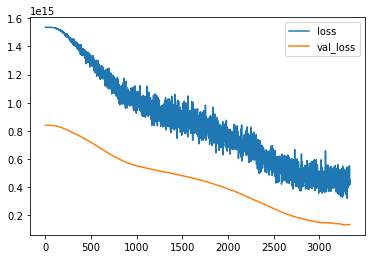

In [26]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [28]:
predictions = model.predict(X_test)

In [29]:
predictions

array([[2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [1.6110446e+08],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [1.6110446e+08],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.8700384e+01],
       [2.870038

In [30]:
np.sqrt(mean_squared_error(y_test,predictions))

11625693.193349186

In [31]:
mean_absolute_error(y_test,predictions)

1610640.625955138

In [32]:
X['RESERVE_AMT'].describe()

count    3.318000e+03
mean     5.784258e+06
std      3.597143e+07
min      5.800000e-02
25%      2.000000e+00
50%      3.902700e+01
75%      3.814600e+04
max      2.360000e+08
Name: RESERVE_AMT, dtype: float64

In [33]:
1610640/5784258.0

0.27845230969987855

In [34]:
# Best possible score is 1.0, lower values are worse.
explained_variance_score(y_test,predictions)

0.8375171912217204

In [38]:
pickle.dump(model,open("Saved Models/calculate-mineral.sav",'wb'))

INFO:tensorflow:Assets written to: ram://7a825bce-acdf-410d-886e-a6a37b936b9c/assets
